# Data Scrapper - Scrapping Tweets
Learn from Tweets with mentions to "Bolsonaro"

In [1]:
#!pip3 install snscrape

import snscrape.modules.twitter as sntwitter
import pandas as pd
from datetime import date
import os
import matplotlib.pyplot as plt
import seaborn as sns

max = 3000

In [2]:
today = int(date.today().strftime("%d"))
df_b = pd.DataFrame(columns=['date', 'url', 'username', 'content'])
df_l = df_b.copy()

In [3]:
for t in range(4, today, 2):
    str_tm1 = str(t-1).zfill(2)
    str_t = str(t).zfill(2)
    if os.path.exists(f'data/Bolsonaro_202210{str_tm1}_a_202210{str_t}.csv'):
        df_b = pd.concat([df_b, pd.read_csv(f'data/Bolsonaro_202210{str_tm1}_a_202210{str_t}.csv', usecols=['date', 'url', 'username', 'content'])], ignore_index=True)
        continue

    print(f'Bolsonaro since:2022-10-{str_tm1} until:2022-10-{str_t}')

    tweets_list = []
    i = 0

    for tweet in sntwitter.TwitterSearchScraper(f'Bolsonaro since:2022-10-{str_tm1} until:2022-10-{str_t}').get_items():
        if i > max:
            break
        tweets_list.append([tweet.date, tweet.url, tweet.user.username, tweet.content])
        i = i + 1

    tweets_df = pd.DataFrame(tweets_list, columns=['date', 'url', 'username', 'content'])
    df_b = pd.concat([df_b, tweets_df], ignore_index=True)
    print (tweets_df.info())
    tweets_df.to_csv(f'data/Bolsonaro_202210{str_tm1}_a_202210{str_t}.csv')


Bolsonaro since:2022-10-03 until:2022-10-04
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 0 to 3000
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   date      3001 non-null   datetime64[ns, UTC]
 1   url       3001 non-null   object             
 2   username  3001 non-null   object             
 3   content   3001 non-null   object             
dtypes: datetime64[ns, UTC](1), object(3)
memory usage: 93.9+ KB
None
Bolsonaro since:2022-10-05 until:2022-10-06
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 0 to 3000
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   date      3001 non-null   datetime64[ns, UTC]
 1   url       3001 non-null   object             
 2   username  3001 non-null   object             
 3   content   3001 non-null   object             
dtypes: datetime64

In [4]:
for t in range(4, today, 2):
    str_tm1 = str(t-1).zfill(2)
    str_t = str(t).zfill(2)
    if os.path.exists(f'data/Lula_202210{str_tm1}_a_202210{str_t}.csv'):
        df_l = pd.concat([df_b, pd.read_csv(f'data/Lula_202210{str_tm1}_a_202210{str_t}.csv', usecols=['date', 'url', 'username', 'content'])], ignore_index=True)
        continue

    print(f'Lula since:2022-10-{str_tm1} until:2022-10-{str_t}')

    tweets_list = []
    i = 0

    for tweet in sntwitter.TwitterSearchScraper(f'Lula since:2022-10-{str_tm1} until:2022-10-{str_t}').get_items():
        if i > max:
            break
        tweets_list.append([tweet.date, tweet.url, tweet.user.username, tweet.content])
        i = i + 1

    tweets_df = pd.DataFrame(tweets_list, columns=['date', 'url', 'username', 'content'])
    df_l = pd.concat([df_l, tweets_df], ignore_index=True)
    print (tweets_df.info())
    tweets_df.to_csv(f'data/Lula_202210{str_tm1}_a_202210{str_t}.csv')

Lula since:2022-10-03 until:2022-10-04
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 0 to 3000
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   date      3001 non-null   datetime64[ns, UTC]
 1   url       3001 non-null   object             
 2   username  3001 non-null   object             
 3   content   3001 non-null   object             
dtypes: datetime64[ns, UTC](1), object(3)
memory usage: 93.9+ KB
None
Lula since:2022-10-05 until:2022-10-06
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 0 to 3000
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   date      3001 non-null   datetime64[ns, UTC]
 1   url       3001 non-null   object             
 2   username  3001 non-null   object             
 3   content   3001 non-null   object             
dtypes: datetime64[ns, UTC](

In [6]:
#!pip3 install nltk
import nltk
import ssl
from nltk.tokenize import RegexpTokenizer

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/marciopmm/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
content_b = '. '.join(df_b.content)
content_l = '. '.join(df_l.content)

In [8]:
tokenizer = RegexpTokenizer(r'\w{3,}')

tokens_b = tokenizer.tokenize(content_b) # nltk.word_tokenize(content, language='portuguese')
tokens_b = [w.lower() for w in tokens_b]

tokens_l = tokenizer.tokenize(content_l) # nltk.word_tokenize(content, language='portuguese')
tokens_l = [w.lower() for w in tokens_l]

In [9]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marciopmm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
sw = nltk.corpus.stopwords.words('portuguese')
sw[:10]

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as']

In [19]:
words_b = [w for w in tokens_b if w not in sw and w not in ['bolsonaro', 'https', 'jairbolsonaro']]
words_l = [w for w in tokens_l if w not in sw and w not in ['lula', 'https', 'lulaoficial']]

In [20]:
nlp_words_b = nltk.FreqDist(words_b)
nlp_words_l = nltk.FreqDist(words_l)

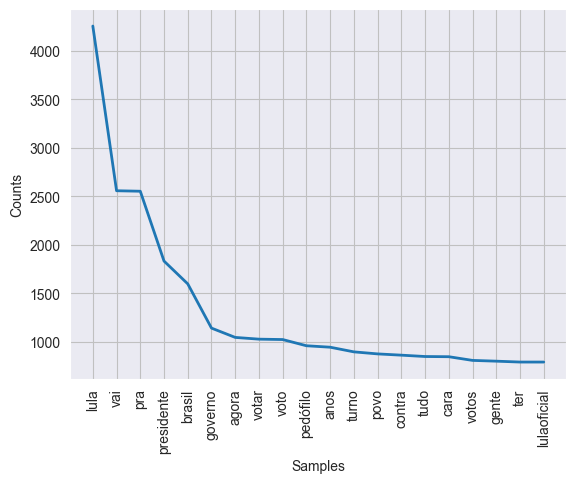

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [21]:
sns.set_style('darkgrid')
nlp_words_b.plot(20)

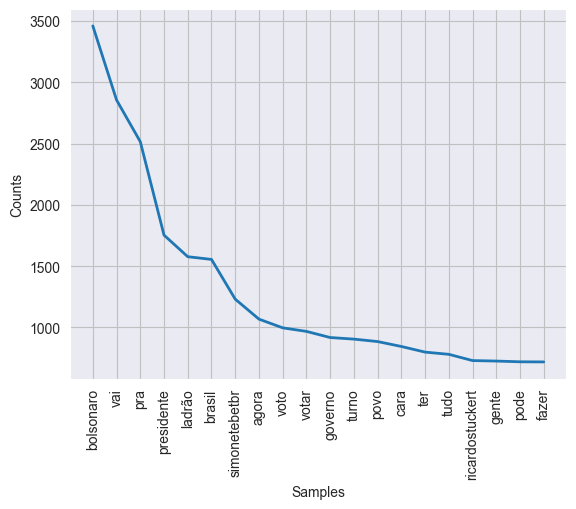

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [22]:
nlp_words_l.plot(20)